### Try-it 8.1: The "Best" Model

This module was all about regression and using Python's scikitlearn library to build regression models.  Below, a dataset related to real estate prices in California is given. While many of the assignments you have built and evaluated different models, it is important to spend some time interpreting the resulting "best" model.  


Your goal is to build a regression model to predict the price of a house in California.  After doing so, you are to *interpret* the model.  There are many strategies for doing so, including some built in methods from scikitlearn.  One example is `permutation_importance`.  Permutation feature importance is a strategy for inspecting a model and its features importance.  

Take a look at the user guide for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html).  Use  the `sklearn.inspection` modules implementation of `permutation_importance` to investigate the importance of different features to your regression models.  Share these results on the discussion board.

In [64]:
import pandas as pd
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
cali = pd.read_csv('C:/Users/oyeye/Downloads/try-it_8_1_starter/data/housing.csv')

In [13]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
cali['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

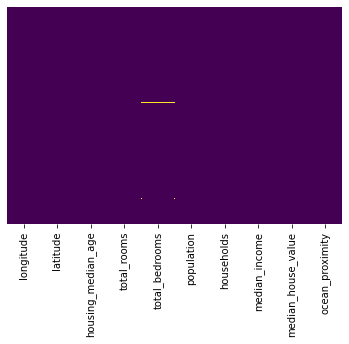

In [16]:
sns.heatmap(cali.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')

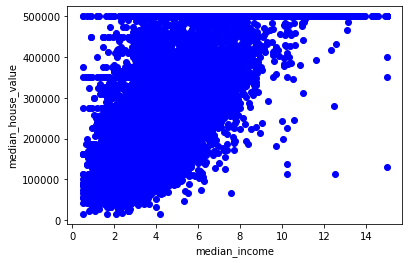

In [17]:
plt.scatter(cali.median_income, cali.median_house_value,  color='blue')
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

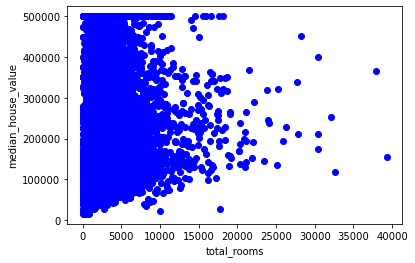

In [18]:
plt.scatter(cali.total_rooms, cali.median_house_value,  color='blue')
plt.xlabel("total_rooms")
plt.ylabel("median_house_value")
plt.show()

In [28]:
calii = cali.dropna()
calii

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [29]:
calii.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [30]:
df = pd.get_dummies(calii.ocean_proximity)

In [34]:
dff = pd.concat([calii, df], axis = 1)
dff.drop(['ocean_proximity'], axis = 1, inplace = True)

In [35]:
dff

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [41]:
cols_to_norm = ['longitude','latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
               'population', 'households', 'median_income']
dff[cols_to_norm] = dff[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [43]:
dff

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,78100.0,0,1,0,0,0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,77100.0,0,1,0,0,0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,92300.0,0,1,0,0,0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,84700.0,0,1,0,0,0


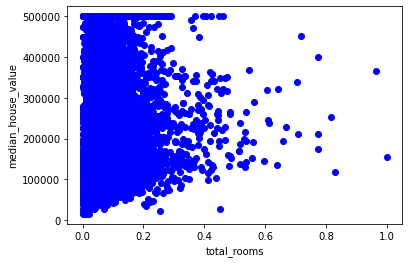

In [45]:
plt.scatter(dff.total_rooms, dff.median_house_value,  color='blue')
plt.xlabel("total_rooms")
plt.ylabel("median_house_value")
plt.show()

In [56]:
outcome = 'median_house_value'
predictors = [c for c in dff.columns if c not in outcome]

In [57]:
X = dff[predictors]
y = dff[outcome]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [62]:
y_test

1325      87000.0
17503    210700.0
14372    466700.0
4033     500001.0
3931     178800.0
           ...   
15295    187500.0
16397    135000.0
7718     230000.0
3759     174200.0
13499     69700.0
Name: median_house_value, Length: 6130, dtype: float64

In [65]:
lr = LinearRegression().fit(X_train, y_train)
train_mse = mean_squared_error(y_train, lr.predict(X_train))
test_mse = mean_squared_error(y_test, lr.predict(X_test))

In [68]:
train_mse

4762495980.100052

In [67]:
test_mse

4594891091.607462

In [69]:
lr.coef_

array([ -275082.43617395,  -245594.56227697,    55446.44259216,
        -234109.87097886,   662022.14312791, -1369058.7159389 ,
         292929.11554553,   563697.24493582,   -25213.66238397,
         -63467.00197985,   141747.43398616,   -29866.32179743,
         -23200.4478249 ])

In [70]:
lr.intercept_

286289.107381408

In [71]:
lr.score(X_test, y_test)

0.652677614579396

In [87]:
from sklearn.inspection import permutation_importance
r = permutation_importance(lr, X_test, y_test,
                          n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{dff.columns[i]:<8}", 
                 f"{r.importances_mean[i]:.3f}", 
                 f" +/- {r.importances_std[i]:.3f}")

median_income 0.828  +/- 0.015
latitude 0.465  +/- 0.008
longitude 0.457  +/- 0.007
population 0.295  +/- 0.006
total_bedrooms 0.288  +/- 0.007
<1H OCEAN 0.138  +/- 0.004
households 0.050  +/- 0.002
total_rooms 0.028  +/- 0.002
housing_median_age 0.028  +/- 0.002
median_house_value 0.025  +/- 0.002
ISLAND   0.013  +/- 0.001
NEAR BAY 0.006  +/- 0.001


In [82]:
from sklearn.model_selection import cross_validate

In [84]:
>>> scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
>>> r_multi = cross_validate(
...     lr, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)
...
>>> for metric in r_multi:
...     print(f"{metric}")
...     r = r_multi[metric]
...     for i in r.importances_mean.argsort()[::-1]:
...         if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
...             print(f"    {dff.columns[i]:<8}"
...                   f"{r.importances_mean[i]:.3f}"
...                   f" +/- {r.importances_std[i]:.3f}")

TypeError: cross_validate() got an unexpected keyword argument 'n_repeats'